In [33]:
import keras
import numpy as np

In [1]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

2024-01-14 20:54:05.227153: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 20:54:05.227185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 20:54:05.228025: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-14 20:54:05.233233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 20:54:05.943669: W tensorflow/compiler/tf2

In [2]:
print(X_train.shape, y_train.shape)
print('==='*7)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
X_train.dtype

dtype('uint8')

In [4]:
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [5]:
print(X_valid.shape, y_valid.shape)

(5000, 28, 28) (5000,)


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

## Creating a Sequential Model

In [8]:
model = keras.models.Sequential(name='Attire_Recognizer_Mark_I')
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) #Because the classes are exclusive 
                                                       #(that means one instance cannot be a part of two classes at the same time)

2024-01-14 20:54:10.704693: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 20:54:10.726750: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 20:54:10.726983: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:
model.summary()

Model: "Attire_Recognizer_Mark_I"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.get_layer('dense_1')

In [11]:
model.layers

In [12]:
model.layers[1] == model.get_layer('dense_1')

False

In [13]:
# Getting the weights of a particular layer
weights, biases = model.get_layer('dense_1').get_weights()


In [14]:
print(weights.shape, biases.shape)

(300, 100) (100,)


In [15]:
# Weights are initialised randomly, needed to break the symmetry while using backprop..
weights

array([[-0.07515192,  0.1091636 ,  0.12020788, ...,  0.10484498,
         0.08132977,  0.05275337],
       [-0.02334657, -0.04084535,  0.06245305, ..., -0.10274827,
         0.06077544,  0.10858663],
       [ 0.01659811,  0.0604564 ,  0.06175204, ..., -0.00093698,
         0.02464584, -0.10883382],
       ...,
       [-0.08733276,  0.02517235, -0.04538706, ...,  0.11926764,
        -0.02562168,  0.01391748],
       [-0.09753338,  0.12029404,  0.10011525, ...,  0.00860766,
        -0.11754108, -0.1137205 ],
       [-0.02627074,  0.04333309,  0.01002703, ..., -0.06097762,
         0.0833322 , -0.07660457]], dtype=float32)

### Weight Initialisers

In [16]:
# Biases are initialsed to zero, which is OK
# If we want to initialise the matrices using a different method,
# we can set "kernel_initialiser" and "bias initialiser"

biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## Compiling the model

In [17]:
"""
Reason for sparse_categorical_crossentropy as loss:
(i.e., for each instance, there is just a target class index, from 0 to 9
in this case), and the classes are exclusive. If instead we had one target
probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3)
then we would need to use the "categorical_crossentropy" loss instead.
"""

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam', #default learning_rate = 0.01
              metrics=['accuracy']
             )

## Training the model

### Handling skewed classes:  
If the training set was very skewed, with some classes being
overrepresented and others underrepresented, it would be useful to set the
class_weight argument when calling the fit() method, which would
give a larger weight to underrepresented classes and a lower weight to
overrepresented classes. 

### Calling the fit method

In [18]:
# we can also use "validation_split=0.1" parameter instead of passing "validation_data" separately
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2024-01-14 20:54:18.184275: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f04b892aa30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-14 20:54:18.184300: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-01-14 20:54:18.190018: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-14 20:54:18.206671: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1705245858.293780   20487 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 4s 2ms/step - loss: 2.4006 - accuracy: 0.6703 - val_loss: 0.8582 - val_accuracy: 0.7120
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7494 - accuracy: 0.7190 - val_loss: 0.7025 - val_accuracy: 0.7440
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6530 - accuracy: 0.7431 - val_loss: 0.6072 - val_accuracy: 0.7734
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6352 - accuracy: 0.7542 - val_loss: 0.5644 - val_accuracy: 0.7962
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5423 - accuracy: 0.7988 - val_loss: 0.5281 - val_accuracy: 0.8196
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5093 - accuracy: 0.8118 - val_loss: 0.4869 - val_accuracy: 0.8374
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4602 - accuracy: 0.8416 - val_loss: 0.4529 - val_accuracy: 0.8446
Epo

## Plotting the training curves

In [19]:
"""
When plotting the training curve, it should be shifted by half an epoch to the left.
The validation error is computed at the end of each epoch,
while the training error is computed using a running mean during each
epoch. So the training curve should be shifted by half an epoch to the left.
"""

'\nWhen plotting the training curve, it should be shifted by half an epoch to the left.\nThe validation error is computed at the end of each epoch,\nwhile the training error is computed using a running mean during each\nepoch. So the training curve should be shifted by half an epoch to the left.\n'

### Keras just continues training where it left off : It’s as simple as calling the fit() method again: 
we should be able to reach close to 89% validation accuracy

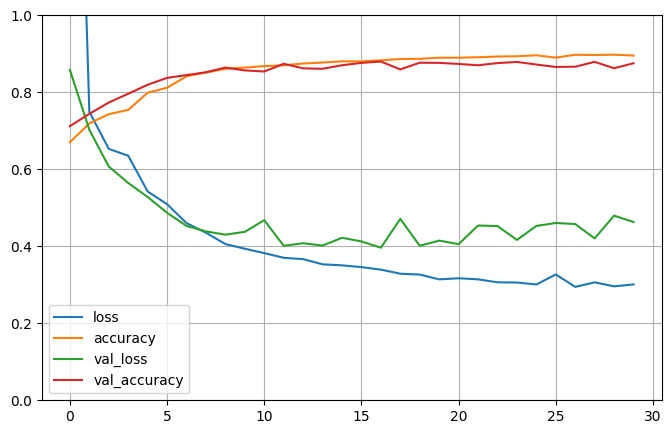

In [20]:
# %matplotlib ipympl
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Evaluating the model on test set

In [25]:
model.evaluate(X_test, y_test, return_dict=True)

313/313 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8677


{'loss': 0.44650688767433167, 'accuracy': 0.8676999807357788}

In [27]:
# Alternate method : These are the two values being output after the evaluate call
model.metrics_names

['loss', 'accuracy']

## Making prediction on instances

In [28]:
X_new = X_test[:3]
y_new = y_test[:3]

y_pred_proba = model.predict(X_new)

1/1 [==============================] - 0s 58ms/step


In [30]:
y_pred_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.07, 0.  , 0.89],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred_classes = np.argmax(model.predict(X_new),axis=1)

1/1 [==============================] - 0s 14ms/step


In [36]:
y_pred_classes

array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new

array([9, 2, 1], dtype=uint8)